<a href="https://colab.research.google.com/github/Violin1208/python_learning/blob/main/MLweek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09/02/22
Convolutional Neural Network trained on MNIST dataset downloaded via keras

In [12]:
import numpy as np

In [13]:
from keras.datasets import mnist

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Check the size of each variable


In [15]:
print('X_train: '+ str(X_train.shape))
print('Y_train: '+ str(y_train.shape))
print('X_test: '+ str(X_test.shape))
print('Y_test: '+ str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


How many numbers in the dataset

In [16]:
print('The labels in the training dataset are',np.unique(y_train))
print('The labels in the test dataset are',np.unique(y_test))

The labels in the training dataset are [0 1 2 3 4 5 6 7 8 9]
The labels in the test dataset are [0 1 2 3 4 5 6 7 8 9]


Viz using matplotlib

In [17]:
from matplotlib import pyplot as plt

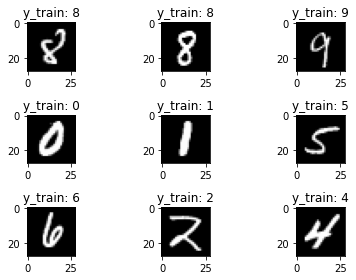

In [18]:
random_numbers = np.random.choice(len(X_train), size=9)

fig, ax = plt.subplots(3,3)

for i, index in enumerate(random_numbers):
  ax[i//3, i%3].imshow(X_train[index], cmap=plt.get_cmap('gray'))
  ax[i//3, i%3].set_title('y_train: %d' %y_train[index])
plt.tight_layout()

Model using keras with tensorflow

In [19]:
import tensorflow as tf


In [20]:
inputs = tf.keras.Input(shape=(28,28,1), name='input')
# 2D Covolution layer with 16 neurons and kernel size of 5x5
#32 layers and 3 by 3 (kernel size) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
#window of 2x2, not necessary to put 32 as it will be the same
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.Dense(16)(x)

#10 neurons here are my final 10 outputs
outputs = tf.keras.layers.Dense(10, activation='sigmoid')(x)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])


opt = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy()


acc = tf.keras.metrics.SparseCategoricalAccuracy()
#compile into a package
model.compile(optimizer=opt, loss=loss, metrics=[acc])
#summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                173088    
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                           

Visualise the shape of the structure

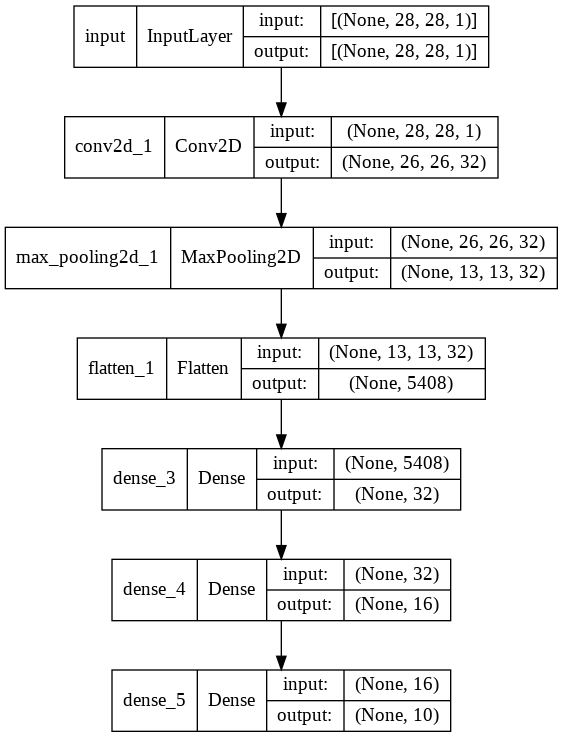

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

Fit the model

In [22]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
#X_train[:,:,:,np.newaxis] 

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 1.5091 - sparse_categorical_accuracy: 0.9131 - val_loss: 0.2669 - val_sparse_categorical_accuracy: 0.9513
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1807 - sparse_categorical_accuracy: 0.9576 - val_loss: 0.1836 - val_sparse_categorical_accuracy: 0.9512
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1366 - sparse_categorical_accuracy: 0.9608 - val_loss: 0.1537 - val_sparse_categorical_accuracy: 0.9571
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1452 - sparse_categorical_accuracy: 0.9582 - val_loss: 0.2052 - val_sparse_categorical_accuracy: 0.9419
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1409 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.1827 - val_sparse_categorical_accuracy: 0.9486
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.

Output

In [23]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


Plot the accuracy from training and testing datasets

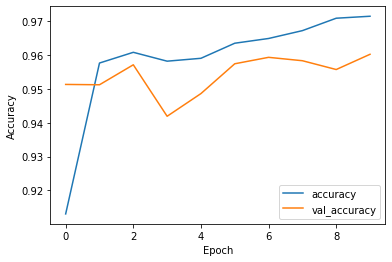

In [24]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Examine the model result by randomly picking 5 pictures 

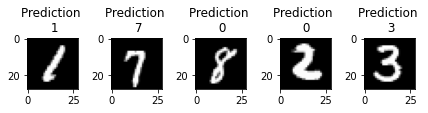

In [28]:
random_numbers = np.random.choice(len(X_test), size=5)

fig, ax = plt.subplots(1,len(random_numbers))
for i, index in enumerate(random_numbers):
  ax[i].imshow(X_test[index], cmap=plt.get_cmap('gray'))
  input_data = np.array([X_test[index]])
  prediction = model.predict(input_data)
  ax[i].set_title('Prediction \n %d' %np.argmax(prediction[0]))

plt.tight_layout()